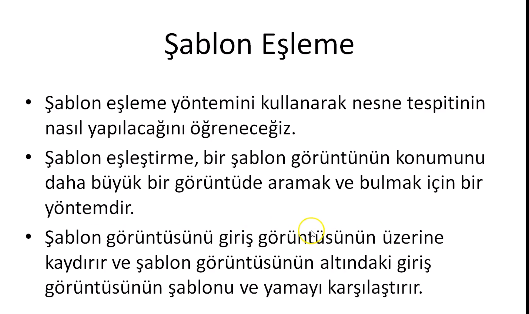

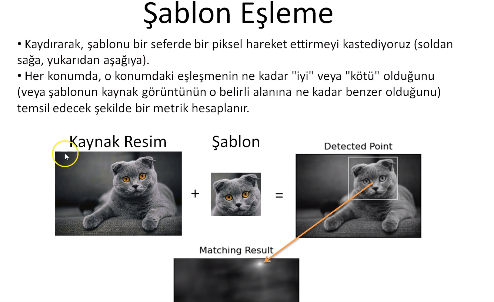

In [21]:
!pip install opencv-python

In [42]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [43]:
#şablon eşleme / template matching

In [44]:
img = cv2.imread("cat.jpg", 0)  #gercek resmim
print(img.shape)

(310, 467)


In [45]:
template = cv2.imread("cat_face.jpg",0) # template edilecek resmim
print(template)

[[ 99 100 100 ...  50  49  49]
 [100 101 101 ...  51  51  50]
 [101 102 102 ...  53  52  52]
 ...
 [171 172 174 ... 154 153 152]
 [172 170 173 ... 152 153 152]
 [172 172 175 ... 162 160 155]]


In [46]:
h,w = template.shape
h,w

(150, 181)

template matching işlemleri için gerekli olan methodlar : 

In [47]:
# bu 6 methodun temel amacı iki resim arasındaki korelasyona bakmak

In [48]:
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

(161, 287)
(161, 287)
(161, 287)
(161, 287)
(161, 287)
(161, 287)


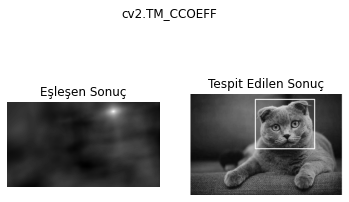

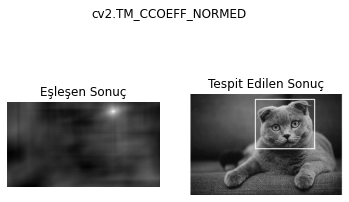

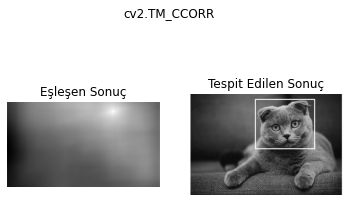

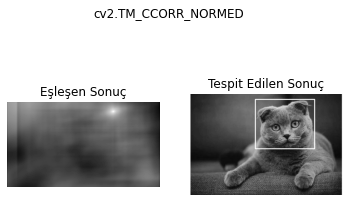

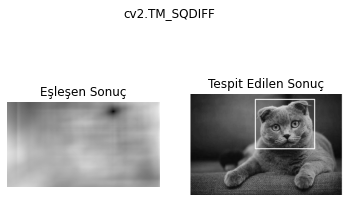

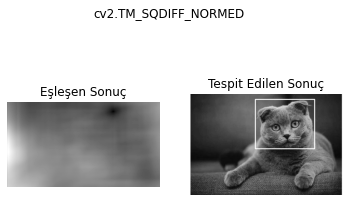

In [49]:
for meth in methods :
    
    method = eval(meth)  # stringleri fonksıyona ceviriyorz =  'cv.TM_CCOEFF' --> cv.TM_CCOEFF
    
    res    = cv2.matchTemplate(img,template,method)
    print(res.shape) # şekline bakacagım ,  orjinal resimle  aynı  olmak zorunda
    min_val , max_val , min_loc, max_loc = cv2.minMaxLoc(res) #çıkan sonucumun min max deeğer ve koordinatlarını alıyorum
    
    if method in [cv.TM_SQDIFF,cv.TM_SQDIFF_NORMED] : #tüm methodlarımın çıktıları aynı değil 
        top_left = min_loc # bunu yapmamızın sebebi bu iki methodta top lefte karşılık gelen min loc olması
    else:
        top_left = max_loc # 
        
    bottom_right = (top_left[0] + w , top_left[1] + h) # kutucuğumu belirttim 
    
    cv2.rectangle(img,top_left,bottom_right, 255,2)  # kutucuk çizdim
    
    plt.figure()
    plt.subplot(121),plt.imshow(res,cmap = "gray") # 121, 1. resim
    plt.title("Eşleşen Sonuç"), plt.axis("off")
    
    plt.subplot(122),plt.imshow(img,cmap = "gray")  # 122, 2.resim
    plt.title("Tespit Edilen Sonuç"), plt.axis("off")
    
    plt.suptitle(meth);
        
     